In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload() #upload data-set directly from local storage

Saving Breast_cancer_data.csv to Breast_cancer_data.csv


In [0]:
bc = pd.read_csv('Breast_cancer_data.csv')

In [0]:
bc.dropna(axis='columns') # drop empty values
bc.shape

(569, 6)

In [0]:
bc.head

In [0]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [0]:
X = bc.drop('diagnosis',axis=1)
y = bc['diagnosis']

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [0]:
#implement K-fold cross validation
scores = []
h_svr = SVR(kernel='rbf')
cross_val = KFold(n_splits=10, random_state=20, shuffle=True)
for train_index, test_index in cross_val.split(X):
  print("Train Index: ", train_index, "\n")
  print("Test Index: ", test_index)
  
  X_train, X_test, y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index]
  h_svr.fit(X_train, y_train)
  scores.append(h_svr.score(X_test,y_test))
  

In [0]:
np.mean(scores)

0.6457622233864282

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)


0.9107142857142857

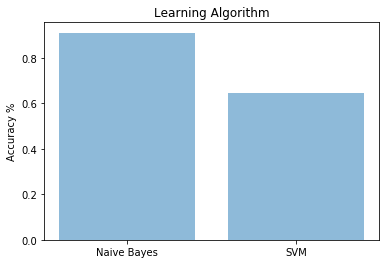

In [0]:
import seaborn as sns
sup = np.mean(scores)
bay = accuracy_score(y_test, y_pred)

algos = ('Naive Bayes','SVM')
y_pos = np.arange(len(algos))
performance = [bay,sup]

plt.bar(y_pos, performance, align='center',alpha=0.5)
plt.xticks(y_pos,algos)
plt.ylabel('Accuracy %')
plt.title('Learning Algorithm')

plt.show()

***As shown above, Naive Bayes performs far better in this scenario***